# **IMPORT LIBERARIES**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# **Data Loading and Analysis**

In [73]:
dataset = pd.read_csv("/content/1553768847-housing.csv")

In [74]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<ipython-input-76-2abc3c2b0e78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

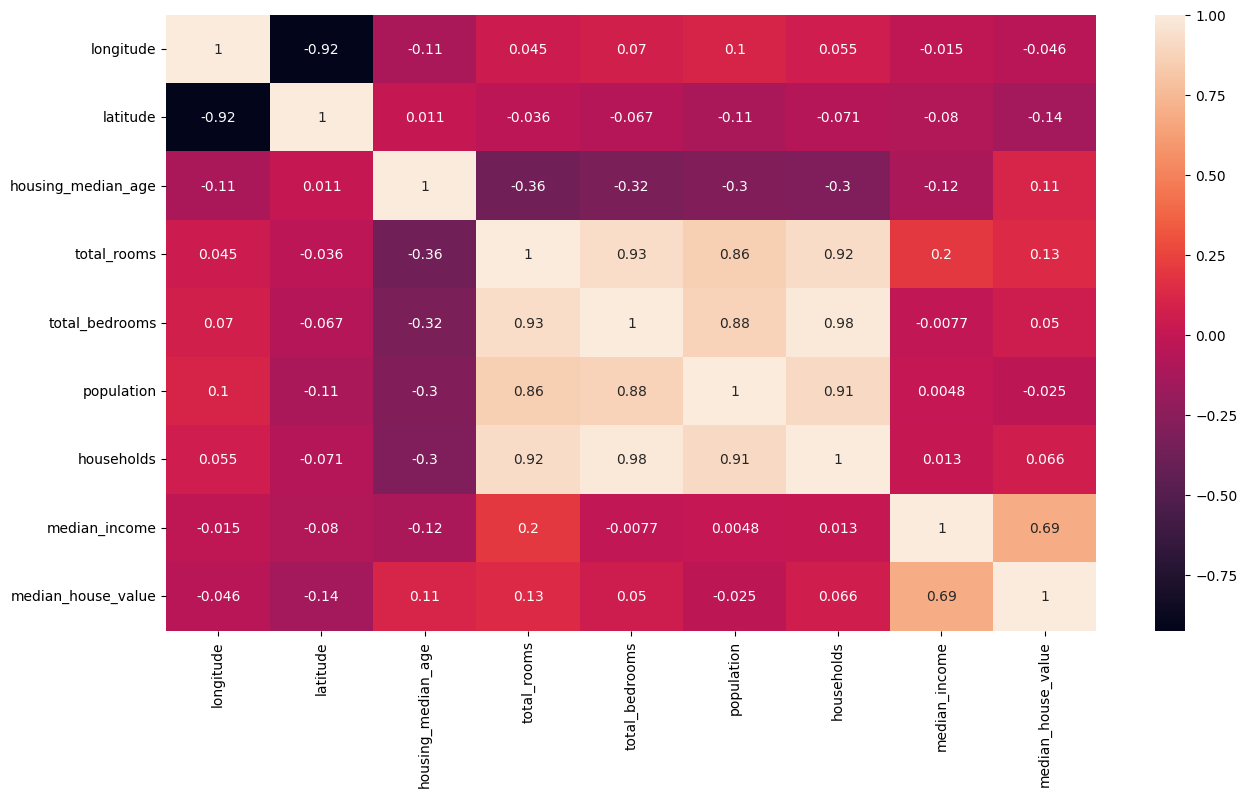

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

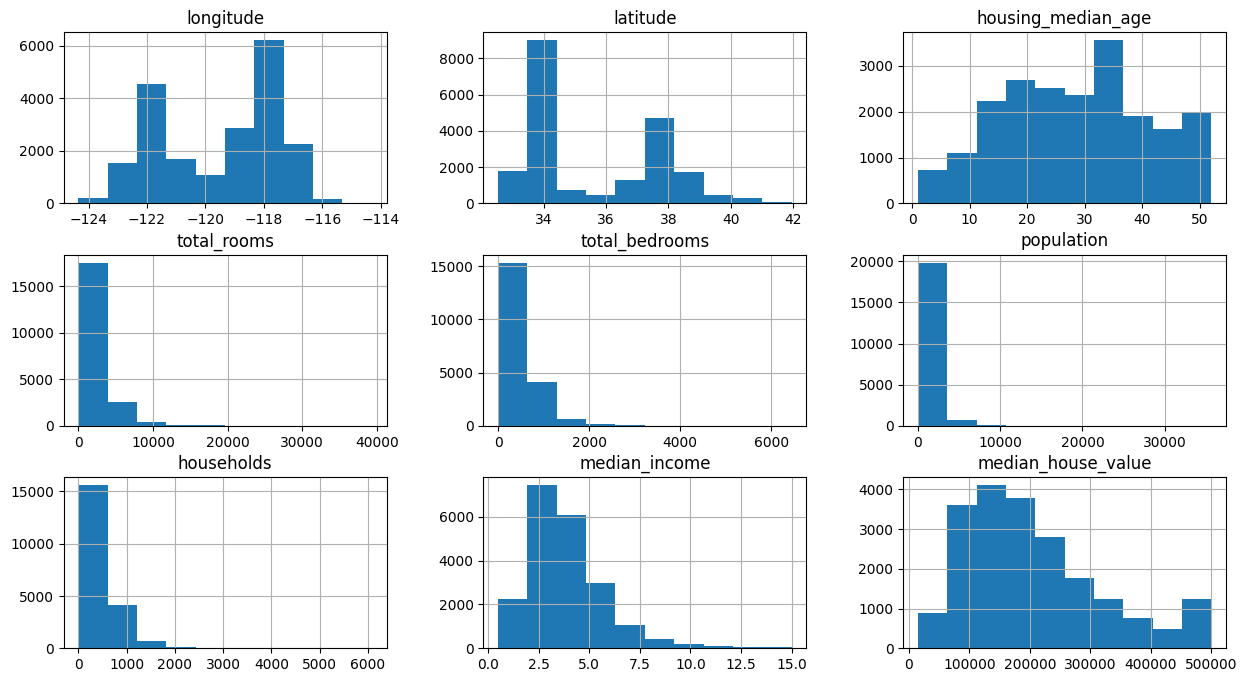

In [77]:
dataset.hist(figsize = (15,8))

## **DATA PREPROCESSING**

In [78]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [79]:
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())
#dataset.dropna(inplace = True)
dataset.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [80]:

#dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity)).drop(["ocean_proximity","ISLAND"],axis = 1)

dataset["ocean_proximity"].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4], inplace=True)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


# **Splitting test train**

In [81]:
from sklearn.model_selection import train_test_split

   # independent variable
X = dataset.drop(["median_house_value"],axis=1)

   # dependent variable
Y = dataset["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
train_data = X_train.join(Y_train)

# **TRAIN DATA**

<Axes: >

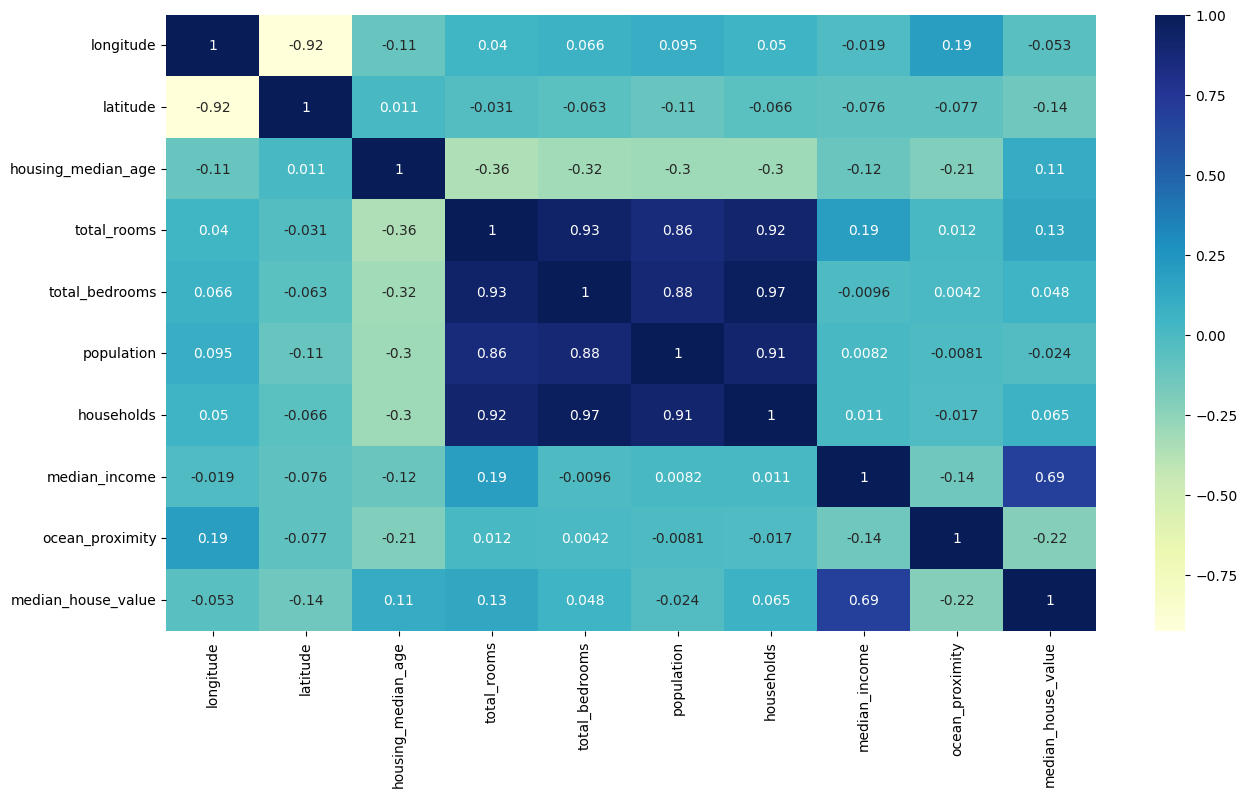

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [83]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =np.log(train_data['population'] + 1)
train_data['households'] =np.log(train_data['households'] + 1)


In [84]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_ratio'] = train_data['total_rooms'] / train_data['households']

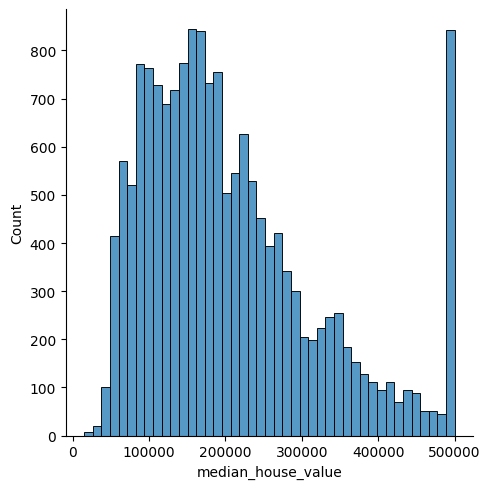

In [85]:
sns.displot(train_data['median_house_value'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'households_ratio'}>]], dtype=object)

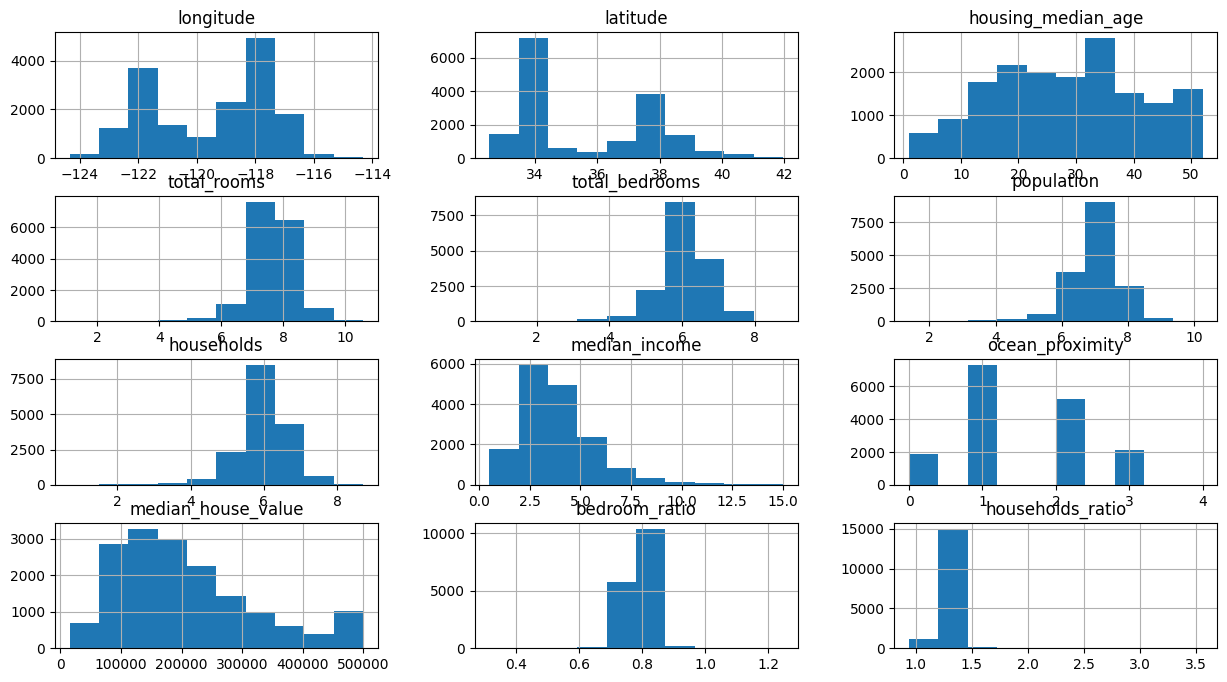

In [86]:
train_data.hist(figsize = (15,8))

# **Model building**

In [87]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']

lr= LinearRegression()
lr.fit(X_train, Y_train)



LinearRegression()

# **TEST DATA**

In [88]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =np.log(test_data['population'] + 1)
test_data['households'] =np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_ratio'] = test_data['total_rooms'] / test_data['households']

X_test, Y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']

In [89]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
4496,-118.22,34.05,34,7.015712,6.289475,6.834109,5.673323,3.1654,1,155000,0.896484,1.236614
8133,-118.12,33.82,43,7.342779,5.659482,6.553933,5.700444,4.1375,1,226000,0.770755,1.288107
80,-122.28,37.81,17,6.829794,5.669881,6.413459,5.669881,1.5000,0,162500,0.830169,1.204574
16504,-121.12,37.73,35,7.010312,5.429346,6.352629,5.351858,2.3924,2,102200,0.774480,1.309884
3463,-118.45,34.31,28,7.334982,5.662960,6.885510,5.620401,4.4773,1,173100,0.772048,1.305064
...,...,...,...,...,...,...,...,...,...,...,...,...
2300,-119.77,36.81,28,7.446585,5.713733,6.498282,5.645447,3.5670,2,85500,0.767296,1.319043
2889,-118.99,35.39,52,7.939515,6.352629,7.189922,6.259581,2.5083,2,70100,0.800128,1.268378
14931,-116.97,32.65,4,9.708142,7.949444,8.985445,7.895063,5.6631,3,233400,0.818843,1.229647
7828,-118.14,33.91,32,7.591862,6.159095,7.224025,6.068426,3.1204,1,204200,0.811276,1.251043


In [90]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
1502,-122.04,37.95,29,6.765039,4.934474,5.834811,4.897840,4.7188,0,197100,0.729408,1.381229
10366,-117.68,33.60,19,8.272315,6.133398,7.406711,6.120297,7.2147,1,303900,0.741437,1.351620
7776,-118.09,33.90,37,7.014814,5.407172,6.648985,5.416100,4.2132,1,164600,0.770822,1.295178
16074,-122.49,37.74,52,7.691657,6.073045,7.045777,6.042633,3.4583,3,321300,0.789563,1.272898
5962,-117.84,34.12,34,7.614312,5.846439,7.041412,5.808142,4.3920,2,187600,0.767822,1.310972
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,-118.31,34.02,23,7.440734,5.986452,7.195937,5.891644,1.3187,1,127100,0.804551,1.262930
19979,-118.73,36.01,14,8.090709,6.480045,7.555382,6.388561,2.8603,2,128900,0.800924,1.266437
1344,-121.90,38.01,34,8.237479,6.642487,7.765145,6.583409,3.5129,2,110600,0.806374,1.251248
1131,-121.63,39.76,22,7.862882,6.180017,7.049255,6.196444,2.8182,2,109700,0.785973,1.268935


# **Evaluvation**

In [91]:
lr.score(X_test, Y_test)

0.6677228758433249

In [92]:
y_pred = lr.predict(X_test)
y_pred

array([243040.09452459, 295865.79078274, 215555.2315016 , ...,
       183836.60818003,  78526.64414197, 190552.08153487])

In [93]:
#Evaluvation: MAE,MSE,RMSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('The Mean Absolute Error(MAE) is: ', mean_absolute_error(Y_test,y_pred))
print('The Mean Square Error(MSE) is: ', mean_squared_error(Y_test,y_pred))
print('The Root Mean Square Error(RMSE) is: ', np.sqrt(mean_squared_error(Y_test,y_pred)))

The Mean Absolute Error(MAE) is:  48205.4608339009
The Mean Square Error(MSE) is:  4348492444.081501
The Root Mean Square Error(RMSE) is:  65943.10004906883


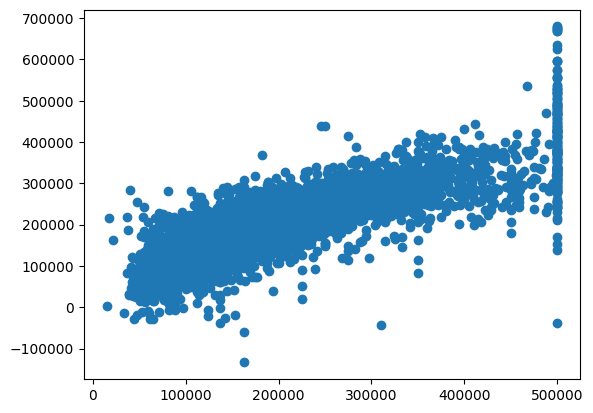

In [94]:
plt.scatter(Y_test,y_pred)